# **Question 1 : Visualizing Pleiades cluster**

Our beloved astronomy club, Krittika, is named after one of the most conspicuous star cluster in the sky, Pleiades. The CSV file stardata.csv
contains four columns of data, which contain the following data for 196 stars in the cluster:


*   Column 1: RA of each star in degrees
*   Column 2: Declination of each star in degrees
*   Column 3: Parallax of each star in milliarcseconds (mas)
*   Column 4: Apparent Magnitude of the star


Parallax $p$ of a star is directly related to its distance $d$ as $d$ in parsecs $= \frac{1}{p}$ where parallax is in arcseconds.

Before proceeding, you need to be able to read the csv file contents, and since the assignment involves graphs, you might want to import some things as well:

In [1]:
#put your import statements here
#use one of the imported libraries to read the contents of csv file in a neat form
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

A little background on magnitude of a star:

Magnitudes in Astronomy are a way to describe how bright an object (in our case, a star) is:

**Apparent magnitude**: Apparent magnitude ($m$) is a measure of the brightness of a star or any other astronomical object observed from the earth. It is similar to the decibel system for sound in that magnitudes are logarithmic and can be calculated according to the formula
$$m = -2.5 \log  { \left ( \dfrac{F}{F_0} \right )} $$
where $F$ is the flux from the star (measured in $W/m^2$), and $F_0$ is a reference flux. 

We can calculate the flux of a star at some distance $d$ away as
$$F = \dfrac{L}{4 \pi d^2}$$

where $L$ is the Luminosity of the star (measured in W).

**Absolute magnitude**: It is the magnitude of the star at a distance of 10 pc, and is related to the apparent magnitude by (and try to see if you can derive this):
$$m-M = -5 + 5\log_{10}(d)$$
where $M$ is the absolute magnitude and $d$ is the distance of the star from us in parsecs (pc).
To read up more about magnitudes, hit up this Wikipedia article - https://en.wikipedia.org/wiki/Magnitude_(astronomy%29.

Using the above info and the earlier relation of distance and parallax, use the imported libraries to find the absolute magnitudes of all the stars of the csv file, and plot a histogram of the distribution, with 50 bins.

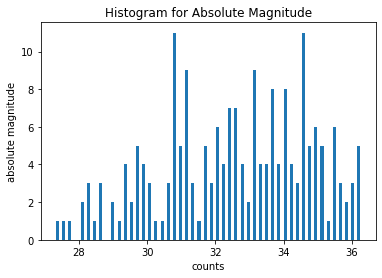

In [2]:
#Solution code

#Loading the input data into a numpy array and removing incomplete
#data points where one or more parameters is not specified

star_data = np.loadtxt('stardata.csv', delimiter = ',', dtype = str)
err_idx = []
for i in range(star_data.shape[0]):
  try:
    star_data[i].astype(float)
  except:
    err_idx.append(i)
    star_data[i] = 0.0
star_data = star_data.astype(float)
star_data = star_data[~np.all(star_data == 0, axis = 1)]

#Computing the absolute magnitude using the given relation and plotting the histogram

abs_mag = star_data[:, 3] + 5 + 5*np.log10(star_data[:,2]*1000)
plt.figure()
plt.hist(abs_mag, bins = 50, rwidth = 0.5)
plt.xlabel('counts')
plt.ylabel('absolute magnitude')
plt.title('Histogram for Absolute Magnitude')
plt.show()

A good way to visualize the actual star cluster as it appears to us in the night sky would be to make a scatter plot of declination and RA on the $y$ and $x$ axes respectively. Try plotting the stars such that the star appears bigger if it is brighter. One way to do this is to make the size of dots in scatter plot proportional to (12 - apparent magnitude) of the star.

(Hint: Google how to make a scatter plot with variable size of dots.)

If you can't make a plot with variable dot sizes, make a simple plot with all dots of same size.

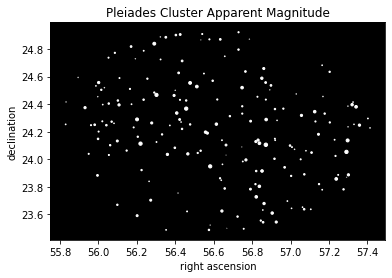

In [3]:
#Solution code

#linearly mapping the apparent magnitudes to the range [0, 12] where 12 corresponds to the 
#least apparent magnitude (brightest) and 0 corresponds to the largest apparent magnitude (dimmest)

min_app_mag = np.min(star_data[:,3])
max_app_mag = np.max(star_data[:,3])
scaling_fac = 12.0
scaled_app_mag= scaling_fac * (max_app_mag - star_data[:,3])/(max_app_mag - min_app_mag)
plt.figure()
ax = plt.axes()
ax.set_facecolor('black')
plt.scatter(star_data[:,0], star_data[:,1], s = scaled_app_mag, c = 'w', )
plt.title('Pleiades Cluster Apparent Magnitude')
plt.xlabel('right ascension')
plt.ylabel('declination')
plt.show()

# **Question 2 : Estimating Age of Universe using Hubble's Law**

In this problem, we will use Hubble's Law on a large number of galaxies, and fit the data to a linear model to find the value of the Hubble Constant, which we will use to calculate the current age of the universe.

You can learn more about Hubble's Law, a very important principle of cosmology and expansion of Universe over here - https://simple.m.wikipedia.org/wiki/Hubble%27s_law 

Step 0: Importing libraries

Dump all the required libraries, and define any necessary constants in the code box below.

You will require the optimize module of scipy library, so be sure to include a line saying `from scipy.optimize import curve_fit`.

In [4]:
#import libraries and define constants
#importing curve fit from scipy

from scipy.optimize import curve_fit

#Defining constants of conversion from Mpc to km and second to year

Mpc = 3.08567758128e+19
sec = 3.1688087814029e-8

Step 2: Loading the data

Open the file "data.txt" and store it in array(s). First row contains the distance modulus (https://en.m.wikipedia.org/wiki/Distance_modulus) of the galaxy from earth, second row contains the line of sight velocity in km/s.

To convert distance modulus to distance in Megaparsecs (the unit we will be using in the rest of the question), use the formula:

$d = 10^{\left(\frac{d_{dist mod}}{5} - 5\right)}$

where $d$ is in megaparsecs (Mpc).

In [5]:
#Load data and convert it to useable form
radvel_data = np.loadtxt('data.txt', delimiter = ',', skiprows = 1,dtype = 'float')

#converting distance modulus to Mpc
dist_parsec = 10**(radvel_data[:,0]/5.0 - 5.0)

Step 3: Preliminary Data Visualization

Create a function taking the distance to the galaxy, and a slope and an intercept parameter as input, returning recession velocity of that galaxy as output. A code snippet showing how to use curve_fit to find the optimum slope and intercept is shown here - https://github.com/krittikaiitb/tutorials/blob/master/Tutorial_07/SciPy1.ipynb 

Create a scatter plot of the line of sight velocity of the galaxies (in km/s) vs the distance to the galaxies (in Mpc). Also plot the model you just fit in the same graph.

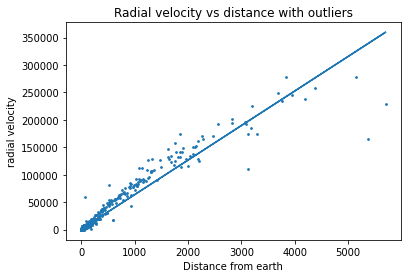

In [6]:
#Create a best fit model and plot the data

#Defining the fitting function which is linear
def radvel_func(d, H, i):
  return H*d + i

#Fitting the curve and obtaining the slope, intercept
popt, _ = curve_fit(radvel_func, dist_parsec, radvel_data[:,1])

#Plotting the data points and the best fit curve
plt.scatter(dist_parsec, radvel_data[:,1], s = 3.0)
plt.plot(dist_parsec, radvel_func(dist_parsec, popt[0], popt[1]))
plt.xlabel('Distance from earth')
plt.ylabel('radial velocity')
plt.title('Radial velocity vs distance with outliers')
plt.show()

Step 4: Removing Outliers (OPTIONAL)

As you can see, there are many points on the outskirts of the graph, which may affect out calulations of the slope and intercept unduly. Devise a way to remove those outliers to your satisfaction, and replot the remaining data points. There are multiple ways to do this, a few of them could be:

1. Removing all points whose distances are 3$\times$(Standard Deviation of Distance from Earth) away from the Mean Distance of all input galaxies from Earth. (or take any factor other than 3)

2. Removing all points which are a certain distance away from the best fit line initially calculated (decide yourself what to set this distance as, could be a factor of the mean distance from the line for all points).

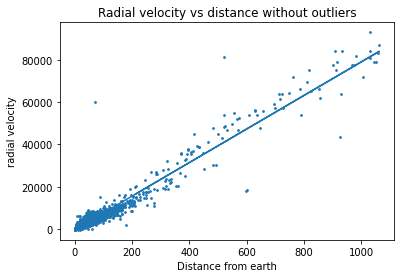

In [7]:
#Remove outliers and replot the improved data

#Identifying the data points lying within 3*standard deviation 
#of distance of earth from the mean distance (Gaussian approximation)
#and removing the rest which are marked as outliers

valid_idx = dist_parsec < 3*np.sqrt(np.var(dist_parsec)) + np.mean(dist_parsec)
new_radvel = radvel_data[valid_idx, 1]
new_dist_parsec = dist_parsec[valid_idx]

#Fitting the refined data points and plotting the data points and the best fit curve
popt, _ = curve_fit(radvel_func, new_dist_parsec, new_radvel)
plt.scatter(new_dist_parsec, new_radvel, s = 3.0)
plt.plot(new_dist_parsec, radvel_func(new_dist_parsec, popt[0], popt[1]))
plt.xlabel('Distance from earth')
plt.ylabel('radial velocity')
plt.title('Radial velocity vs distance without outliers')
plt.show()

Step 5: Conclusion

The slope of the graph (with recessional velocity in the y-axis and distance of the galaxy in the x-axis) gives us the Hubble Constant $H_0$ (in units km/s-Mpc). The reciprocal of the Hubble Constant is a good approximation for the age of the universe. Hence, find the age of the universe using your calculations.

In [8]:
#Solution code
#Computing the age of universe using the conversion constants
age_of_universe = 1.0/(popt[0]) * Mpc * sec
print('Age of Universe : {} yrs'.format(age_of_universe))

Age of Universe : 12295638060.589151 yrs
